- exploring traffic data

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
df_ = pd.read_csv('./data/safety-camera-data.csv')
df_.head()


,TfL Reference (TADS area),Camera Head Reference,Borough,Easting,Northing,Speed limit,Location,Fixed Camera Type,Site monitoring start date,Collisions;Fatal;1990,...,Casualties;Slight;2009,Casualties;Fatal;2010,Casualties;Serious;2010,Casualties;Slight;2010,Casualties;Fatal;2011,Casualties;Serious;2011,Casualties;Slight;2011,Casualties;Fatal;2012,Casualties;Serious;2012,Casualties;Slight;2012
0,CR-B-16012,16/802013,Barking,547752,186619,30mph,- Valence Avenue - Becontree Avenue,Red Light,01/09/1994,0,...,2,0,0,4,0,0,1,0,0,3
1,CR-B-16011,16/802014,Barking,545310,185088,30mph,A124 Longbridge Road - Upney Lane,Red Light,01/09/1994,0,...,4,0,0,5,0,0,4,0,1,7
2,CR-B-16005,16/802015,Barking,549067,184517,20mph,A1240 Heathway - Church Elm Lane,Red Light,01/10/1994,0,...,5,0,0,2,0,0,2,0,0,0
3,CRTH-16003,16/802016,Barking,548860,183545,30mph,A1306 Ripple Road - Merrielands Crescent,Red Light,01/07/1995,0,...,2,0,0,4,0,0,3,0,0,10
4,CR-B-16008,16/802019,Barking,548987,185794,30mph,A1240 Heathway - Oxlow Lane,Red Light,01/03/1996,0,...,1,0,0,1,0,0,1,0,0,2


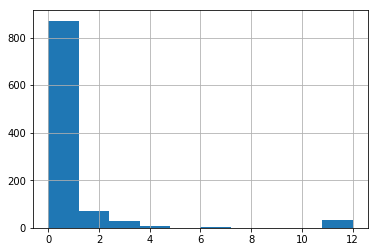

In [6]:
df_['Casualties;Serious;2012'].hist()

In [9]:
df_.columns

Index(['TfL Reference (TADS area)', 'Camera Head Reference', 'Borough',
       'Easting', 'Northing', 'Speed limit', 'Location', 'Fixed Camera Type',
       'Site monitoring start date', 'Collisions;Fatal;1990',
       ...
       'Casualties;Slight;2009', 'Casualties;Fatal;2010',
       'Casualties;Serious;2010', 'Casualties;Slight;2010',
       'Casualties;Fatal;2011', 'Casualties;Serious;2011',
       'Casualties;Slight;2011', 'Casualties;Fatal;2012',
       'Casualties;Serious;2012', 'Casualties;Slight;2012'],
      dtype='object', length=147)

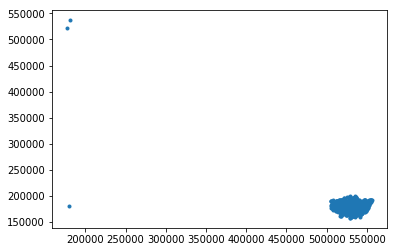

In [54]:
pl.plot(df_.Easting, df_.Northing, '.')

In [63]:
df_ = df_[df_.Easting >=400000]

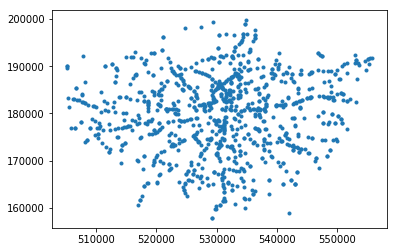

In [65]:
pl.plot(df_.Easting, df_.Northing, '.')

Casaulty data

In [10]:
df_cas = pd.read_csv('./data/TFL-road-casualty-data-since-2005.csv')
df_cas.head()

,AREFNO,Borough,Boro,Easting,Northing,CREFNO,Casualty_Class,Casualty_Sex,Casualty_Age__Banded_,Casualty_Age,...,Casualty_Severity,Ped__Location,Ped__Movement,Mode_of_Travel,Year,LSOA11CD,MSOA11CD_2,Ward13CD,Ward14CD,Borough-name-geocode
0,0105CP00001,CITY OF LONDON,0,533230,181490,1,2 Passenger,2 Female,25-59,28,...,3 Slight,-2 Unknown,-2 N/A,4 Car,2005,E01032739,E02000001,E09000001,E05009292,City of London
1,0105CP00002,CITY OF LONDON,0,533740,180550,1,3 Pedestrian,1 Male,Unknown,Unknown,...,3 Slight,09 In Road - Not Crossing,5 In Rd Not Crossing,1 Pedestrian,2005,E01004293,E02000890,E05000585,E05009330,Tower Hamlets
2,0105CP00003,CITY OF LONDON,0,533230,181500,1,1 Driver/Rider,1 Male,60+,63,...,3 Slight,-2 Unknown,-2 N/A,5 Taxi,2005,E01032739,E02000001,E09000001,E05009292,City of London
3,0105CP00004,CITY OF LONDON,0,531750,180830,2,2 Passenger,1 Male,25-59,28,...,3 Slight,-2 Unknown,-2 N/A,4 Car,2005,E01032739,E02000001,E09000001,E05009297,City of London
4,0105CP00004,CITY OF LONDON,0,531750,180830,1,1 Driver/Rider,1 Male,Unknown,Unknown,...,3 Slight,-2 Unknown,-2 N/A,4 Car,2005,E01032739,E02000001,E09000001,E05009297,City of London


In [11]:
df_cas.columns

Index(['AREFNO', 'Borough', 'Boro', 'Easting', 'Northing', 'CREFNO',
       'Casualty_Class', 'Casualty_Sex', 'Casualty_Age__Banded_',
       'Casualty_Age', 'No__of_Casualties', 'Casualty_Severity',
       'Ped__Location', 'Ped__Movement', 'Mode_of_Travel', 'Year', 'LSOA11CD',
       'MSOA11CD_2', 'Ward13CD', 'Ward14CD', 'Borough-name-geocode'],
      dtype='object')

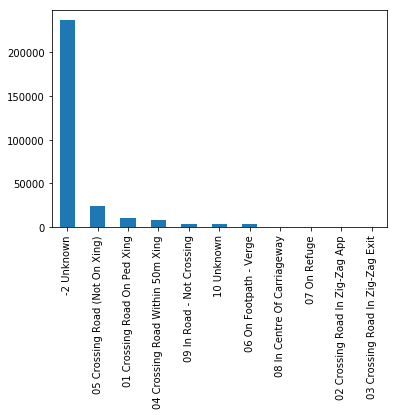

In [15]:
df_cas.Ped__Location.value_counts().plot(kind='bar')

In [37]:
(df_cas.Ped__Location.unique())

array(['-2 Unknown', '09 In Road - Not Crossing',
       '04 Crossing Road Within 50m Xing',
       '05 Crossing Road (Not On Xing)', '08 In Centre Of Carriageway',
       '06 On Footpath - Verge', '01 Crossing Road On Ped Xing',
       '07 On Refuge', '10 Unknown', '03 Crossing Road In Zig-Zag Exit',
       '02 Crossing Road In Zig-Zag App'], dtype=object)

In [38]:
colors = dict(zip(df_cas.Ped__Location.unique(), ['r', 'b', 'g', 'orange', 'y', 
                                                  'purple', 'gray', 'm', 'pink', 'k', 
                                                  'c', 'mediumpurple']))

In [39]:
colors

{'-2 Unknown': 'r',
 '01 Crossing Road On Ped Xing': 'gray',
 '02 Crossing Road In Zig-Zag App': 'c',
 '03 Crossing Road In Zig-Zag Exit': 'k',
 '04 Crossing Road Within 50m Xing': 'g',
 '05 Crossing Road (Not On Xing)': 'orange',
 '06 On Footpath - Verge': 'purple',
 '07 On Refuge': 'm',
 '08 In Centre Of Carriageway': 'y',
 '09 In Road - Not Crossing': 'b',
 '10 Unknown': 'pink'}

In [29]:
df_cas.Casualty_Age.replace('Unknown', 0, inplace=True)

In [45]:
np.array(df_cas.Ped__Location.replace(colors))

array(['r', 'b', 'r', ..., 'r', 'r', 'r'], dtype=object)

Multivariate Model  
- number of accidents by type per ward, compared to all the other features
- make a dataset that has 1) unique indentifier 2) ward 3) the number of each of the types of accident 4) features

In [66]:
df_att = pd.read_csv('./data/2014-gla-data-extract-attendant.csv')
df_att.head()

,AREFNO,Borough,Boro,Easting,Northing,Location,Accident Severity,No. of Casualties in Acc.,No. of Vehicles in Acc.,Accident Date,...,Junction Detail,Junction Control,Road Class 2,Road No. 2,Ped. Crossing Decoded,Light Conditions (Banded),Weather,Road Surface,Special Conditions,C/W Hazard
0,0114CP00001,CITY OF LONDON,0,533540,181230,ST BOTOLPH STREET J/W HOUNDSDITCH,3 Slight,1,1,01-Jan-14,...,3 T/Stag Jun,4 Give Way/Uncontrolled,A,1211,0 No Xing Facility In 50m,2 Dark,1 Fine,2 Road-Wet,0 None,0 None
1,0114CP00002,CITY OF LONDON,0,532680,181430,MOORGATE J/W GREAT SWAN ALLEY,3 Slight,1,1,08-Jan-14,...,3 T/Stag Jun,4 Give Way/Uncontrolled,C,0,0 No Xing Facility In 50m,1 Daylight,1 Fine,1 Road-Dry,0 None,0 None
2,0114CP00003,CITY OF LONDON,0,532090,181830,ALDERGATE STREET J/W LONG LANE,2 Serious,1,1,09-Jan-14,...,3 T/Stag Jun,2 Auto Sig,C,0,5 Pedn Phase At Ats,2 Dark,1 Fine,1 Road-Dry,0 None,0 None
3,0114CP00004,CITY OF LONDON,0,531770,180950,QUEEN VICTORIA STREET J/W PUDDLE DOCK,2 Serious,1,2,08-Jan-14,...,3 T/Stag Jun,2 Auto Sig,C,0,5 Pedn Phase At Ats,1 Daylight,1 Fine,1 Road-Dry,0 None,0 None
4,0114CP00005,CITY OF LONDON,0,533130,180920,FENCHURCH STREET J/W ROOD LANE,3 Slight,1,1,15-Jan-14,...,3 T/Stag Jun,4 Give Way/Uncontrolled,C,0,0 No Xing Facility In 50m,1 Daylight,1 Fine,1 Road-Dry,0 None,0 None


In [68]:
df_att.columns

Index(['AREFNO', 'Borough', 'Boro', 'Easting', 'Northing', 'Location',
       'Accident Severity', 'No. of Casualties in Acc.',
       'No. of Vehicles in Acc.', 'Accident Date', 'Day', 'Time', 'Highway',
       'Road Class 1', 'Road No. 1', 'Road Type', 'Speed Limit',
       'Junction Detail', 'Junction Control', 'Road Class 2', 'Road No. 2',
       'Ped. Crossing Decoded', 'Light Conditions (Banded)', 'Weather',
       'Road Surface', 'Special Conditions', 'C/W Hazard'],
      dtype='object')

In [69]:
df_att.Location.unique()

array(['ST BOTOLPH STREET J/W HOUNDSDITCH',
       'MOORGATE J/W GREAT SWAN ALLEY', 'ALDERGATE STREET J/W LONG LANE',
       ..., 'WATERMEAD WAY J/W LEESIDE ROAD',
       'NFL WEIR HALL ROAD J/W BARCLAY ROAD',
       'MERIDIAN WAY J/W LEESIDE ROAD'], dtype=object)